In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [2]:
!kaggle datasets download -d utkarshsaxenadn/car-vs-bike-classification-dataset

 98% 101M/103M [00:04<00:00, 29.1MB/s] 
100% 103M/103M [00:04<00:00, 22.2MB/s]


In [3]:
from zipfile import ZipFile
path='/content/car-vs-bike-classification-dataset.zip'
with ZipFile(path,'r') as files:
  files.extractall()

In [4]:
import os
import cv2
from google.colab.patches import cv2_imshow
import numpy as np

In [5]:
bike_files=os.listdir("/content/Car-Bike-Dataset/Bike")
car_files=os.listdir("/content/Car-Bike-Dataset/Car")

In [6]:
label=[0]*len(bike_files)+[1]*len(car_files)

In [7]:
len(label)

4000

In [8]:
data=[]
path="/content/Car-Bike-Dataset/Bike/"
for img in bike_files:
  image=cv2.imread(path+img)
  image=cv2.resize(image,(128,128))
  data.append(image)
path="/content/Car-Bike-Dataset/Car/"
for img in car_files:
  image=cv2.imread(path+img)
  image=cv2.resize(image,(128,128))
  data.append(image)

In [9]:
len(data)

4000

In [10]:
X=np.array(data)
y=np.array(label)

array([[[113, 103,  96],
        [113, 103,  96],
        [113, 103,  96],
        ...,
        [142, 134, 127],
        [140, 132, 125],
        [140, 132, 125]],

       [[113, 103,  96],
        [113, 103,  96],
        [113, 103,  96],
        ...,
        [142, 134, 127],
        [140, 132, 125],
        [140, 132, 125]],

       [[112, 102,  95],
        [112, 102,  95],
        [112, 102,  95],
        ...,
        [141, 133, 126],
        [140, 132, 125],
        [140, 132, 125]],

       ...,

       [[240, 240, 240],
        [240, 240, 240],
        [240, 240, 240],
        ...,
        [223, 221, 220],
        [223, 221, 220],
        [224, 222, 221]],

       [[240, 242, 242],
        [240, 242, 242],
        [240, 242, 242],
        ...,
        [226, 225, 224],
        [225, 225, 224],
        [226, 227, 225]],

       [[240, 242, 242],
        [240, 242, 242],
        [240, 242, 242],
        ...,
        [226, 227, 225],
        [224, 227, 225],
        [225, 228, 226]]], dtype=uint8)
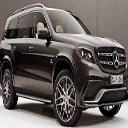

In [11]:
X[2300]

array([[[158, 228, 192],
        [158, 228, 192],
        [158, 228, 192],
        ...,
        [209, 199, 139],
        [209, 199, 139],
        [209, 199, 139]],

       [[158, 228, 192],
        [158, 228, 192],
        [158, 228, 192],
        ...,
        [209, 199, 139],
        [209, 199, 139],
        [209, 199, 139]],

       [[158, 228, 192],
        [158, 228, 192],
        [158, 228, 192],
        ...,
        [209, 199, 139],
        [209, 199, 139],
        [209, 199, 139]],

       ...,

       [[186, 213, 163],
        [186, 213, 163],
        [185, 212, 162],
        ...,
        [234, 182, 111],
        [238, 183, 110],
        [238, 183, 108]],

       [[185, 212, 162],
        [185, 212, 162],
        [185, 212, 162],
        ...,
        [233, 181, 110],
        [237, 182, 109],
        [237, 182, 107]],

       [[185, 212, 162],
        [185, 212, 162],
        [185, 212, 162],
        ...,
        [233, 181, 110],
        [237, 182, 109],
        [237, 182, 107]]], dtype=uint8)
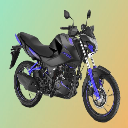

In [12]:
X[2]

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [15]:
y_train

array([1, 0, 1, ..., 0, 1, 1])

In [16]:
X_train.shape

(3200, 128, 128, 3)

In [17]:
X_train_sc,X_test_sc=X_train/255,X_test/255

In [18]:
from tensorflow.keras import models,layers

In [33]:
model=models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(128,128,3)))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(128,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [34]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 126, 126, 32)      896       
                                                                 
 batch_normalization_9 (Bat  (None, 126, 126, 32)      128       
 chNormalization)                                                
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 63, 63, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 61, 61, 64)        18496     
                                                                 
 batch_normalization_10 (Ba  (None, 61, 61, 64)        256       
 tchNormalization)                                               
                                                      

In [35]:
model.fit(X_train_sc,y_train,epochs=20,validation_split=0.1)

Epoch 1/20
90/90 [==============================] - 126s 1s/step - loss: 0.6022 - accuracy: 0.8326 - val_loss: 3.5418 - val_accuracy: 0.4844
Epoch 2/20
90/90 [==============================] - 124s 1s/step - loss: 0.1826 - accuracy: 0.9274 - val_loss: 8.5594 - val_accuracy: 0.4844
Epoch 3/20
90/90 [==============================] - 122s 1s/step - loss: 0.1115 - accuracy: 0.9566 - val_loss: 1.0841 - val_accuracy: 0.6438
Epoch 4/20
90/90 [==============================] - 124s 1s/step - loss: 0.0612 - accuracy: 0.9806 - val_loss: 0.6638 - val_accuracy: 0.7875
Epoch 5/20
90/90 [==============================] - 129s 1s/step - loss: 0.0438 - accuracy: 0.9854 - val_loss: 0.2808 - val_accuracy: 0.8938
Epoch 6/20
90/90 [==============================] - 121s 1s/step - loss: 0.0232 - accuracy: 0.9924 - val_loss: 0.1875 - val_accuracy: 0.9187
Epoch 7/20
90/90 [==============================] - 124s 1s/step - loss: 0.0197 - accuracy: 0.9924 - val_loss: 0.2172 - val_accuracy: 0.9312
Epoch 8/20
90

In [37]:
model.evaluate(X_test_sc,y_test)

25/25 [==============================] - 10s 383ms/step - loss: 0.2299 - accuracy: 0.9525


[0.22986383736133575, 0.9524999856948853]

In [48]:
X_sc=X/255

In [57]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [50]:
prediction=model.predict(X_sc)

125/125 [==============================] - 59s 472ms/step


In [68]:
pred=np.array([np.round(i) for i in prediction])

In [69]:
accuracy_score(y,pred)

0.98725

In [58]:
confusion_matrix(y,pred)

array([[1968,   32],
       [  19, 1981]])

In [59]:
print(classification_report(y,pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      2000
           1       0.98      0.99      0.99      2000

    accuracy                           0.99      4000
   macro avg       0.99      0.99      0.99      4000
weighted avg       0.99      0.99      0.99      4000



In [62]:
import pickle
pickle.dump(model,open('bike_car.pkl','wb'))

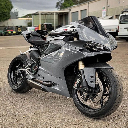

1/1 [==============================] - 0s 32ms/step
[[7.599337e-11]]
Bike


In [41]:
path='/content/bike1.jpeg'
image=cv2.imread(path)
image=cv2.resize(image,(128,128))
cv2_imshow(image)
image=image/255
image=np.reshape(image,(1,128,128,3))
pred=model.predict(image)
print(pred)
if np.round(pred)==1:
  print("Car")
else:
  print("Bike")

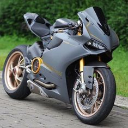

1/1 [==============================] - 0s 34ms/step
[[0.01423756]]
Bike


In [42]:
path='/content/bike2.jpeg'
image=cv2.imread(path)
image=cv2.resize(image,(128,128))
cv2_imshow(image)
image=image/255
image=np.reshape(image,(1,128,128,3))
pred=model.predict(image)
print(pred)
if np.round(pred)==1:
  print("Car")
else:
  print("Bike")

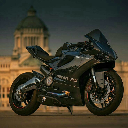

1/1 [==============================] - 0s 40ms/step
[[4.4976673e-08]]
Bike


In [43]:
path='/content/bike3.jpeg'
image=cv2.imread(path)
image=cv2.resize(image,(128,128))
cv2_imshow(image)
image=image/255
image=np.reshape(image,(1,128,128,3))
pred=model.predict(image)
print(pred)
if np.round(pred)==1:
  print("Car")
else:
  print("Bike")

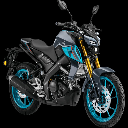

1/1 [==============================] - 0s 34ms/step
[[3.2013674e-15]]
Bike


In [61]:
path='/content/bike4.jpeg'
image=cv2.imread(path)
image=cv2.resize(image,(128,128))
cv2_imshow(image)
image=image/255
image=np.reshape(image,(1,128,128,3))
pred=model.predict(image)
print(pred)
if np.round(pred)==1:
  print("Car")
else:
  print("Bike")

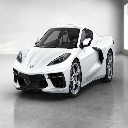

1/1 [==============================] - 0s 31ms/step
[[1.]]
Car


In [44]:
path='/content/car1.jpeg'
image=cv2.imread(path)
image=cv2.resize(image,(128,128))
cv2_imshow(image)
image=image/255
image=np.reshape(image,(1,128,128,3))
pred=model.predict(image)
print(pred)
if np.round(pred)==1:
  print("Car")
else:
  print("Bike")

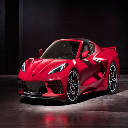

1/1 [==============================] - 0s 32ms/step
[[1.]]
Car


In [46]:
path='/content/car2.jpeg'
image=cv2.imread(path)
image=cv2.resize(image,(128,128))
cv2_imshow(image)
image=image/255
image=np.reshape(image,(1,128,128,3))
pred=model.predict(image)
print(pred)
if np.round(pred)==1:
  print("Car")
else:
  print("Bike")

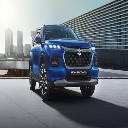

1/1 [==============================] - 0s 31ms/step
[[0.9999972]]
Car


In [47]:
path='/content/car3.jpeg'
image=cv2.imread(path)
image=cv2.resize(image,(128,128))
cv2_imshow(image)
image=image/255
image=np.reshape(image,(1,128,128,3))
pred=model.predict(image)
print(pred)
if np.round(pred)==1:
  print("Car")
else:
  print("Bike")

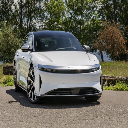

1/1 [==============================] - 0s 70ms/step
[[1.]]
Car


In [60]:
path='/content/car4.jpeg'
image=cv2.imread(path)
image=cv2.resize(image,(128,128))
cv2_imshow(image)
image=image/255
image=np.reshape(image,(1,128,128,3))
pred=model.predict(image)
print(pred)
if np.round(pred)==1:
  print("Car")
else:
  print("Bike")